Autora: Alba Casillas Rodríguez

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow

Ejercicio 1:

Función ejercicio 1:
    Leer una imagen y permitir mostrarla tanto en grises como en color. Mostraré la imagen mediante el uso de otra función en la se llamarán a los métodos correspondientes de matplotlib para visualización de imágenes.
    
    función: leeimagen(filename, flagColor)
    
        función OpenCv: cv2.imread(filename, flagColor)
    
        flagColor es la variable que determina si la imagen se muestra en escala
        de grises o a color.
        
        Valores para flagColor que usaremos en el ejercicio:
        Fuente: https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
            cv2.IMREAD_COLOR : lee la imagen a color RGB. Valor por defecto
            cv2.IMREAD_GRAYSCALE : lee la imagen con escala de grises.


EJERCICIO 1: 
Leemos la imagen a color y con escala de grises: 


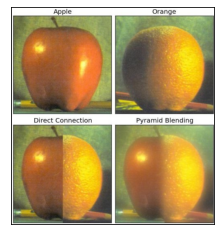

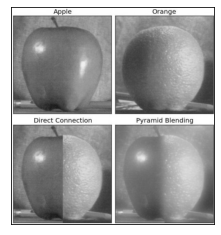

In [10]:
def mostrarimagen(im):
    
    # Dibujar imagen
    
    # Ojo con los detalles!! OpenCV almacena las imágenes en BGR en lugar de RGB. Si leemos con
    # OpenCV y visualizamos con matplotlib debemos tener cuidado.
    
    im2rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im2rgb)
    plt.xticks([]), plt.yticks([])  # no se muestran valores en los ejes X e Y
    plt.show()
    
    """
    
    Otra manera de cargar las imagenes, aunque se abre en una ventana externa.
    
        cv2.namedWindow('image', cv2.WINDOW_NORMAL)
        cv2.imshow('image',im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    """
    
    return im2rgb
 

def leeimagen(filename, flagColor):
    
    # Cargamos la imagen
    im = cv2.imread(filename,flagColor)
    
    return im


# Llamada a la función que lee la imagen
print("EJERCICIO 1: ")

filename = '/content/drive/MyDrive/Colab Notebooks/images/orapple.jpg'

print("Leemos la imagen a color y con escala de grises: ")
im = leeimagen(filename, cv2.IMREAD_COLOR)
im2rgb = mostrarimagen(im)

im_bw = leeimagen(filename, cv2.IMREAD_GRAYSCALE)
im2rgb = mostrarimagen(im_bw)


Función ejercicio 2:
    
    Visualizar una matriz de números reales cualquiera/arbitraria,tanto monobanda como tribanda.
    Para ello se deberá escalar el rango de cada banda al intervalo [0,1]
    sin pérdida de información.
    
    La idea es NORMALIZAR dichas matrices al intervalo [0,1]
    
    Normalizar valores de pixeles:
        Fuente: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
        
        En las imagenes, los pixeles son enteros entre [0,255], y se puede normalizar los pixeles
        a un valor entre [0,1]

In [11]:
def pintaI(im):
    
    # Para no trabajar sobre la imagen original, haremos una copia
    im_normalized = np.copy(im)
    
    # sacamos el minimo y el maximo de todos los valores
    # pixel_min = np.min(im_normalized)
    # pixel_max = np.max(im_normalized)
    
    # Confirmamos que los valores están entre 0 y 255
    # print('Tipo de dato: %s' % im_normalized.dtype) RESULTADO: unit8 (integer sin signo) -> LO VAMOS A PASAR A FLOAT
    # print('Min: %.3f, Max: %.3f' % (pixel_min, pixel_max))
    
    #Como el resultado sale en unit8, lo voy a pasar a float64
    im_normalized = im_normalized.astype(np.float64)
    
    
    # im_normalized /= 255.0
     
    # Formula para normalizar una matriz:
    # Fuente: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79
    min = im_normalized.min()
    max = im_normalized.max()
    
    im_normalized = (im_normalized - min) / (max - min)
    
    
    # pixel_min = np.min(im_normalized)
    # pixel_max = np.max(im_normalized)

    # print('Tipo de dato: %s' % im_normalized.dtype) #RESULTADO: float64
    # print('Min: %.3f, Max: %.3f' % (pixel_min, pixel_max))
    
    # Se muestra la matrix resultante
    print(im_normalized)

        
    return im_normalized

#Llamamos a la función pintaI
print("EJERCICIO 2: ")
print("Matrix imagen a color: ")
im_normalized = pintaI(im)

print()
print("Matrix imagen a escala de grises: ")
im_normalized = pintaI(im_bw)


EJERCICIO 2: 
Matrix imagen a color: 
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.96470588 0.97254902 1.        ]
  [0.96862745 0.98039216 1.        ]
  [0.98039216 0.99215686 1.        ]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.98431373 0.98431373 0.98431373]
  [0.96078431 0.96078431 0.96078431]]

 [[0.98431373 0.99215686 1.        ]

Función ejercicio 3:
    
    Visualizar varias imagenes distintas a la vez (concatenando imagenes en una única)
    
    Fuente: https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaf9771c991763233866bf76b5b5d1776f
    Para la concatenación de las imagenes se usará la función hconcat, a la que como parámetros
    se le pasará dos o más imagenes en forma de matrices, las cuales deberán tener el mismo 
    número de filas (dimensión) y profundidad.
    
    Para obtener la misma profundidad, usaremos la función cvtColor (Convierte una imagen de un espacio de color a otro)
    
    Para obtener la misma dimensión, obtendré la altura máxima de entre todas las imagenes de la lista,
    y el resto se adecuarán a este tamaño siendo rellenadas por un borde.
    
    ¿Qué pasa si tienen distintos tamaños o número de canales? Se deberá adecuar la dimensión y profundidad,
    de lo contrario, no se podrán concatenar en una misma imagen.
    
    En concreto, yo obtengo el error: 
    error: (-215:Assertion failed) src[i].dims <= 2 && src[i].rows == src[0].rows && src[i].type() == src[0].type() 
    in function 'cv::hconcat'

Visualizamos las imagenes concatenadas: 
El resultado será visualizado en una ventana externa....


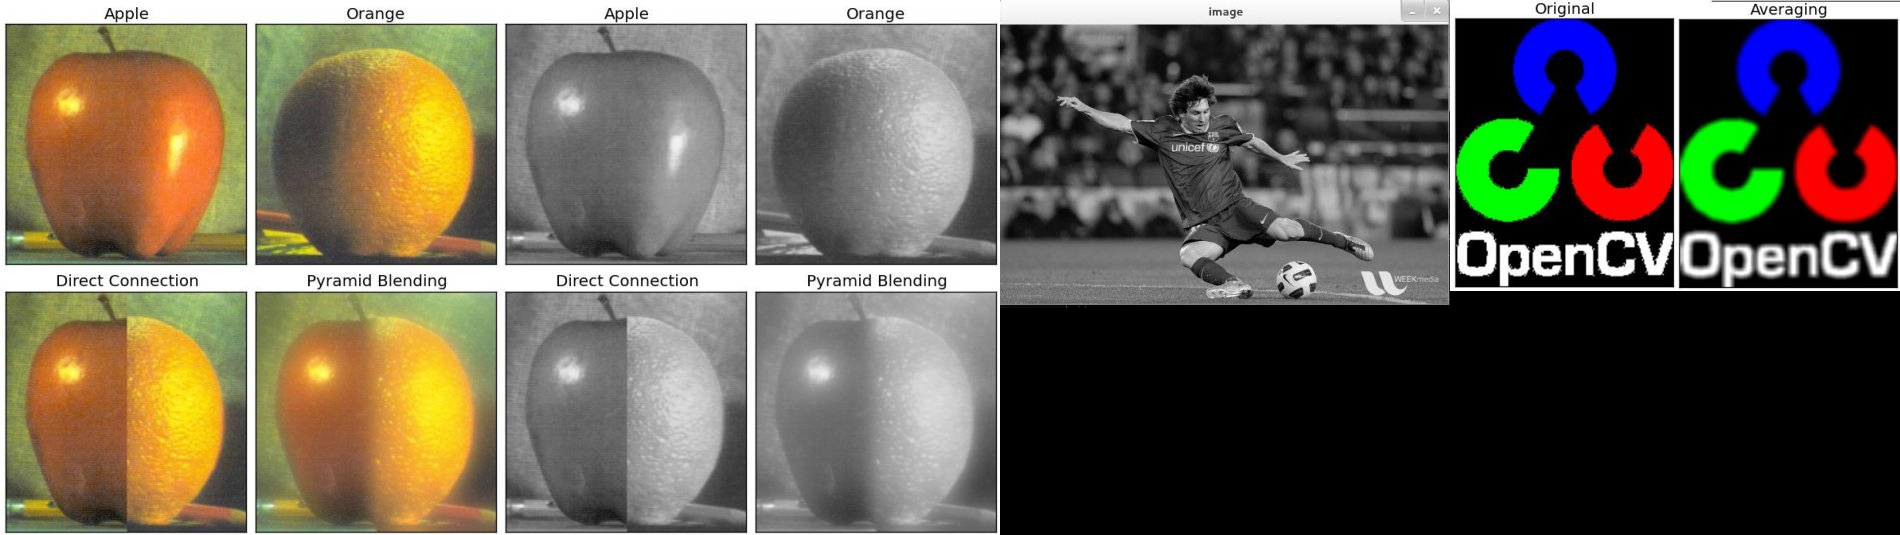

In [14]:
def pintaMI(vim):
    
    # Se obtiene la dimensión máxima
    # Función shape: El "shape" de un array es una tupla con el numero de elementos por eje (dimensión)
    # https://www.python-course.eu/numpy_create_arrays.php
    max_dim = max(una_im.shape[0] for una_im in vim)
    
    for i,una_im in enumerate(vim):
        if len(una_im.shape) == 2: #imagenes monobanda 
            vim[i] = cv2.cvtColor(vim[i], cv2.COLOR_GRAY2BGR)
        
        if una_im.shape[0] < max_dim:
            # https://stackoverflow.com/questions/36255654/how-to-add-border-around-an-image-in-opencv-python
            # https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36
            vim[i] = cv2.copyMakeBorder(vim[i], 0, max_dim - vim[i].shape[0],0,0,cv2.BORDER_CONSTANT, value = (0,0,0,0))
    
    vim_concat = cv2.hconcat(vim)
    cv2_imshow(vim_concat)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Leemos las imagenes
# Leer imagenes y pasarlas de BGR a RGB
filename = '/content/drive/MyDrive/Colab Notebooks/images/orapple.jpg'

im1 = leeimagen(filename, cv2.IMREAD_COLOR)
im2 = leeimagen(filename, cv2.IMREAD_GRAYSCALE)

filename = '/content/drive/MyDrive/Colab Notebooks/images/messi.jpg'

im3 = leeimagen(filename, cv2.IMREAD_GRAYSCALE)


filename = '/content/drive/MyDrive/Colab Notebooks/images/logoOpenCV.jpg'

im4 = leeimagen(filename, cv2.IMREAD_COLOR)

# Crear lista con imagenes
list_im = [im1, im2, im3, im4]


# Llamamos a la función pintaMI
print("Visualizamos las imagenes concatenadas: ")
pintaMI(list_im)

Función ejercicio 4:
    
    Modifica el color en la imagen de cada uno de los elementos de una lista de coordenadas de pixeles.
    (¡¡Recordamos: (fila,columna) es lo contrario a (x,y). Es decir, fila=y, columna=x!!)
    Se insertará un cuadrado azul de 100x100 pixeles en el centro de la imagen a modificar

EJERCICIO 4: 


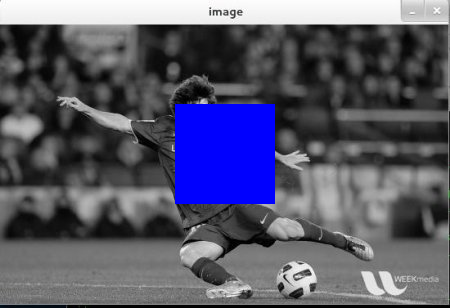

In [31]:
def dibujaCuadrado(filename):
    # El cuadrado será tamaño 100x100
    dimension = 100 
    
    im = cv2.imread(filename)
    
    im2 = im.copy()
    # Función shape: El "shape" de un array es una tupla con el numero de elementos por eje (dimensión)
    height, width, _ = im2.shape 
    
    #print(height)
    #print(width)
    
    # Valores para colocar la imagen en el centro de la imagen
    Ylocation = (height - dimension) / 2
    Ylocation = int(math.ceil(Ylocation)) # El resultado lo devuelve en float (.0) asi que lo convierto a int
    
    Xlocation = (width - dimension) / 2
    Xlocation = int(math.ceil(Xlocation))
    
    # im2[Y_ini:Y_fin, X_ini:X_fin , :] = [B,G,R] BGR porque es el formato que lee openCV
    im2[Ylocation:dimension+Ylocation , Xlocation:dimension+Xlocation ,:] = [255,0,0]
    
   
    # Mostramos la imagen con el cuadrado
    cv2_imshow(im2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


print("EJERCICIO 4: ")

filename = '/content/drive/MyDrive/Colab Notebooks/images/messi.jpg'

dibujaCuadrado(filename)

Función ejercicio 5:
    
    Representar varias imagenes con sus titulos en una misma ventana.
    
    Fuente: https://www.delftstack.com/es/howto/matplotlib/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
    Para mostrar varias imagenes en una figura, mostramos cada una de ellas mediante las funciones de subplots

EJERCICIO 5: 
Visualizamos las imagenes con sus respectivos titulos: 


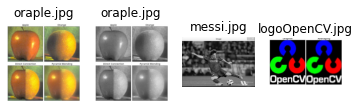

In [20]:
def pintaConTitulo(vim, titles):
    num_im = len(vim)
    
    # Creamos un subplot por cada imagen
    # "_" sirve para ignorar el primer caracter (en este caso, la figura en sí)
    # Si no lo añadiesemos se obtendria el error: 'Figure' object has no attribute 'imshow'
    _, list_subplots = plt.subplots(1, num_im)  
    
    for i in range(num_im):
       list_subplots[i].imshow(vim[i]) 
       list_subplots[i].set_title(titles[i])
    
       # list_subplots[i].xticks([]), list_subplots[i].yticks([])
       list_subplots[i].axis("off")
        
    plt.show()

print("EJERCICIO 5: ")
print("Visualizamos las imagenes con sus respectivos titulos: ")

# Creamos la lista de imagenes de nuevo, ya que en este ejercicio muestro los resultados
# con el uso de la librería plt; que invierte los colores RGB

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)


# Crear lista con imagenes
list_im = [im1, im2, im3, im4]

# Creamos una lista de titulos
titles = ["oraple.jpg", "oraple.jpg", "messi.jpg", "logoOpenCV.jpg"]

pintaConTitulo(list_im, titles)